# NBA 데이터를 가지고 적합한 포지션 판단

https://www.basketball-reference.com/leagues/NBA_2017_per_game.html

% 기호는 리눅스 운영체제의 SHELL을 의미하고

! 기호는 윈도우 운영체제의 CMD를 의미한다.

예를들어, 현재 위치의 목록을 확인한다.

리눅스 : %ls

윈도우 : !dir

In [3]:
# 현재 작업중인 디렉토리의 위치를 알려줌

%pwd

'C:\\python'

## 실제 농구선수의 경기 기록을 바탕으로 임의의 선수 표지션을 예측할 수 있다.

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('basketball_stat.csv')

In [7]:
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


- (1) Pos : 포지션
- (2) 3P : 3점슛
- (3) 2P : 2점슛
- (4) TRB : 한경기당 평균 리바운드
- (5) AST : 한경기당 평균 패스 성공 횟수
- (6) STL : 한경기당 평균 가로채기 성공 횟수
- (7) BLK : 한경기당 평균 블로킹 성공 횟수

### 데이터 개수 확인

In [8]:
df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

- C : 센터
- SG : 슈팅가드

### 데이터 시각화

### - 뚜렷한 결정경계선을 찾기 위해서 칼럼별로 2개씩 짝지어서 그래프를 그려보자 

Text(0.5, 1.0, 'STL and 2P in 2D plane')

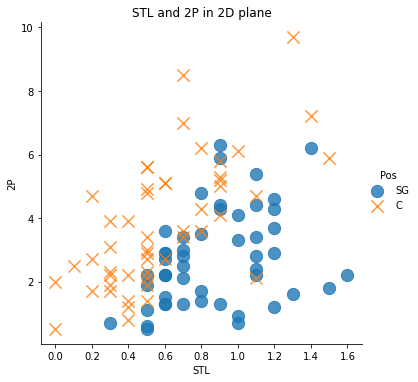

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2점슛, 스틸 데이터 시각화

sns.lmplot(x='STL', y='2P', data=df,
           fit_reg=False,
           scatter_kws={'s':150},
           markers=['o','x'],
           hue='Pos')

plt.title('STL and 2P in 2D plane')

Text(0.5, 1.0, 'AST and 2P in 2D plane')

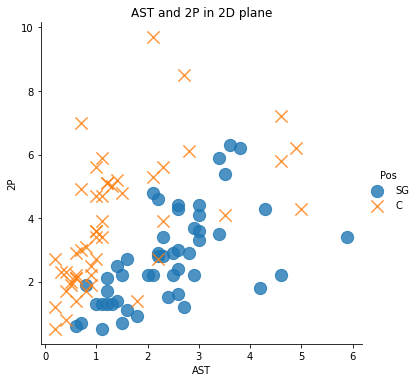

In [10]:
# 2점슛, 어시스트 데이터 시각화

sns.lmplot(x='AST', y='2P', data=df, fit_reg=False, scatter_kws={'s':150}, markers=['o','x'], hue='Pos')

plt.title('AST and 2P in 2D plane')

Text(0.5, 1.0, 'AST and 2P in 2D plane')

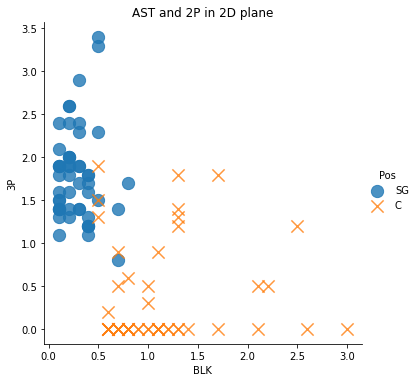

In [11]:
# 3점슛, 블로킹 데이터 시각화

sns.lmplot(x='BLK', y='3P', data=df, fit_reg=False, scatter_kws={'s':150}, markers=['o','x'], hue='Pos')

plt.title('AST and 2P in 2D plane')

Text(0.5, 1.0, 'STL and 3P in 2D plane')

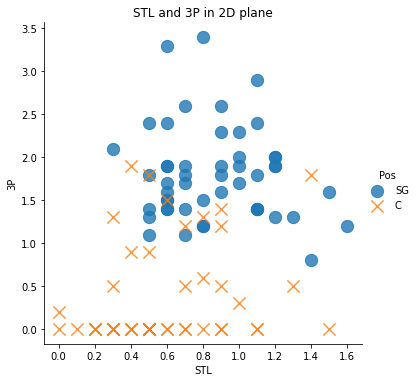

In [12]:
sns.lmplot(x='STL', y='3P', data=df,
           fit_reg=False,
           scatter_kws={'s':150},
           markers=['o','x'],
           hue='Pos')

plt.title('STL and 3P in 2D plane')

Text(0.5, 1.0, 'BLK and 3P in 2D plane')

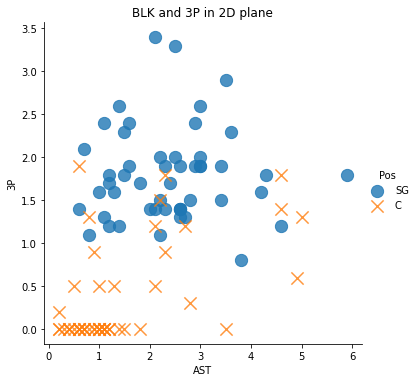

In [13]:
sns.lmplot(x='AST', y='3P', data=df,
           fit_reg=False,
           scatter_kws={'s':150},
           markers=['o','x'],
           hue='Pos')

plt.title('BLK and 3P in 2D plane')

Text(0.5, 1.0, 'TRB and 3P in 2D plane')

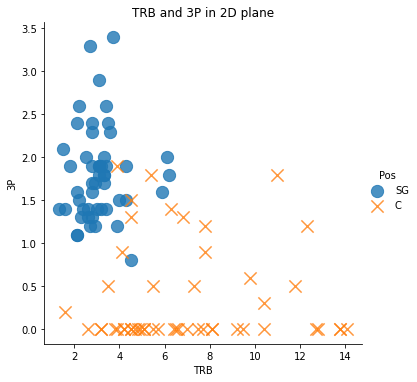

In [14]:
sns.lmplot(x='TRB', y='3P', data=df,
           fit_reg=False,
           scatter_kws={'s':150},
           markers=['o','x'],
           hue='Pos')

plt.title('TRB and 3P in 2D plane')

Text(0.5, 1.0, 'BLK and TRB in 2D plane')

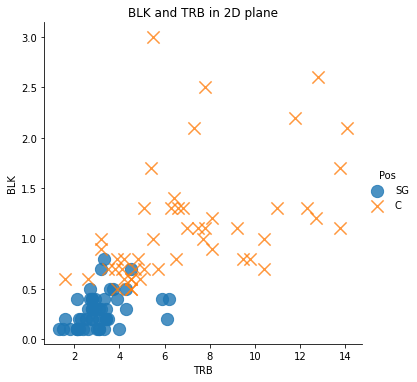

In [15]:
sns.lmplot(x='TRB', y='BLK', data=df,
           fit_reg=False,
           scatter_kws={'s':150},
           markers=['o','x'],
           hue='Pos')

plt.title('BLK and TRB in 2D plane')

#### 시각화 자료를 기준으로 포지션을 선택하는데, SG, C를 기준으로 할 경우에는

#### 리바운드, 블로킹, 3점슛 항목을 기준으로 선택할 수 있으며,

#### 2점슛과 어시스트, 가로채기는 SG, C 포지션 선택항목으로는 부적합함을 알 수 있다.

## 정제 : 데이터 다듬기

### 분별력 없는 특징을 데이터에서 제거한다.
#### axis = 0 , 데이터 프레임에서 위/아래 행방향으로 작업 진행
#### axis = 1 , 데이터 프레임에서 좌/우 열방향으로 작업 진행

In [16]:
df.drop(['2P', 'AST', 'STL'], axis=1, inplace =True)

In [17]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


## 데이터 분류 (학습용 / 테스트용으로 구분)

데이터 분류 시 사이킷런의 train_test_split 사용하여 간단하게 데이터를 분류할 수 있다.

In [18]:
from sklearn.model_selection import train_test_split

# 학습용으로 80%, 테스트용으로 20% 데이터 분류한다.
train, test = train_test_split(df, test_size=0.2)

In [19]:
train.shape[0]

80

In [20]:
test.shape[0]

20

## 데이터 저장하기

In [21]:
import pickle

with open('basketball_train.pkl', 'wb') as train_data :
    pickle.dump(train, train_data)
    
with open('basketball_test.pkl', 'wb') as test_data :
    pickle.dump(test, test_data)

### pickle함수

- 파이썬 객체를 파일에 저장하는 것을 피클링이라 함.
- 파일에서 객체를 읽어들이는 것을 언피클링이라 한다.

피클링의 기준은 텍스트 파일이다.

일반적인 텍스트 파일을 저장할때는 파일 입출력을 사용한다.

하지만, 리스트나 클래스 같은 텍스트가 아닌 자료형은 일반적인 파일 입출력으로는 데이터를 저장하거나 불러올 수 없다.

파이썬에서 텍스트 이외의 자료형을 파일로 저장/호출 하기 위한 모듈이 pickle 모듈이다.

In [39]:
# 일반적인 텍스트 파일을 저장하는 경우

text = 'python'

with open('python.txt', 'w') as f:
    f.write(text)

In [44]:
# 리스트 파일을 저장하는 경우

list = ['a','b','c']

with open('list.txt', 'wb') as f:
    pickle.dump('list.txt', f)

### 저장된 함수를 피클 함수로 불러오기 

In [45]:
with open('list.txt', 'rb') as f:
    data = pickle.load(f)

In [46]:
data

'list.txt'

## 피클함수 예제

In [1]:
import pickle 

Name = '손흥민'
키 = '183cm'
몸무게 =  '77kg'
혈액형 = 'AB형'
    
with open('son.p', 'wb') as file:
    pickle.dump(Name, file)
    pickle.dump(키, file)
    pickle.dump(몸무게, file)
    pickle.dump(혈액형, file)

In [51]:
with open('son.p', 'rb') as f:
    data = pickle.load(f)

In [52]:
data

'손흥민'

In [3]:
import pickle 

with open('son.p', 'rb') as f:
    Name = pickle.load(f)
    키 = pickle.load(f)
    몸무게 = pickle.load(f)
    혈액형 = pickle.load(f)
    
    print("이름: ",Name)
    print("키: ",키)
    print("몸무게: ",몸무게)
    print("혈액형: ",혈액형)

이름:  손흥민
키:  183cm
몸무게:  77kg
혈액형:  AB형


## 농구선수 포지션 예측하기 - 계속

In [41]:
import pandas as pd
import pickle # 파일 저장 또는 불러오기 위해서
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # 수치, 통계

%matplotlib inline # 그래프를 노트북안에 출력
np.random.seed(5)

UsageError: unrecognized arguments: # 그래프를 노트북안에 출력


## 최적의 k 값 찾아내기
- (Cross Validation : 교차 검증)

In [42]:
# 라이브러리 호출
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# k의 최댓값에서 2로 나눈 값(몫)을 사용한다. (교차검증은 학습 데이터의 절반까지만 진행)
max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2): # 3부터 지정(1 이상의 홀수만: 1 또는 짝수는 값이 치우칠 수 있음)
    k_list.append(i)
    
cross_validation_scores = []

# 학습용 데이터로 3점슛, 블로킹, 리바운드 항목을 선택
x_train = train[['3P','BLK','TRB']]  # train_data
# 테스트용 데이터로 포지션을 선택
y_train = train[['Pos']]             # test_data

# 교차 검증을 10번 돌림, K=10, 각 k를 대상으로 검증 결과를 저장한다.
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(),
                            cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.8875,
 0.875,
 0.875,
 0.8625,
 0.875,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.875,
 0.875,
 0.875,
 0.8625,
 0.8625,
 0.85,
 0.85,
 0.825,
 0.8,
 0.8]

## 데이터 시각화 (k의 변화에 따른 정확도)

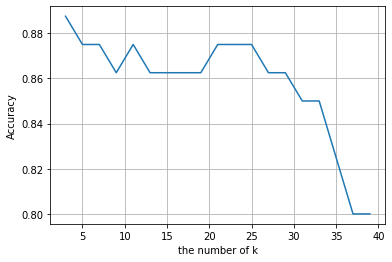

The best number of k : 3


In [45]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

# k의 최적값을 찾아본다.
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k : " + str(k))

## 모델 테스트

- 6개의 매개변수(3P, 2P, BLK, PRB, AST, STL) 중에서 변별력이 있다고 판단된 3개 변수(3P, BLK, TRB)의 속성을 사용해서 
- KNN 모듈을 학습시켜 테스트를 진행한다.

In [57]:
# 모듈 호출
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 학습 모델 알고리즘 선택
knn = KNeighborsClassifier(n_neighbors = k) # k값 넣어줌

# 학습에 사용할 속성 지정
x_train = train[['3P','BLK','TRB']]
# 테스트용 데이터로 포지션을 선택
y_train = train[['Pos']]

# KNN 모델로 학습 진행
knn.fit(x_train, y_train.values.ravel())

# 테스트 데이터에서 분류를 위해 사용한 속성 지정
x_test = test[['3P','BLK','TRB']]
# 선수 포지션에 대한 정답 지정
y_test = test[['Pos']]

# 테스트 시작
predict = knn.predict(x_test)

In [58]:
print(predict) # 20개 예측 정답 데이터 출력

['C' 'SG' 'C' 'SG' 'C' 'C' 'C' 'SG' 'SG' 'C' 'SG' 'SG' 'SG' 'C' 'C' 'SG'
 'SG' 'C' 'SG' 'C']


## 실제값과 예측값 비교하기

In [59]:
comparision = pd.DataFrame( {'prediction(예측)' : predict, 'ground_truth(정답)' : y_test.values.ravel()} )

comparision

,prediction(예측),ground_truth(정답)
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,C,C
